# Explore and Analyze Tornadoes from 2013 using MATLAB in Jupyter

## MATLAB in Jupyter

Welcome to your first Jupyter Notebook running MATLAB as the kernel.  This means that you can write all commands in the MATLAB language and MATLAB will do the computation for you.  More details on the MATLAB Kernel for Jupyter can be found in this blogpost: https://blogs.mathworks.com/matlab/2023/01/30/official-mathworks-matlab-kernel-for-jupyter-released/ 

The only difference between this Jupyter notebook and ones you may have used before is that ALL of the code shown here is MATLAB code.  Everything else is **exactly the same** including

* How you evaluate cells - Shift+Enter or CTRL+Enter
* Double clicking on text cells (such as this one) to edit Markdown

## Discussion of our problem

Today, we are going to work with historical data from storm events in the United States in 2013. The file includes over 40 different types of storm events, and contain information such as geographic location, date, damage cost in dollars, injuries, deaths, and text descriptions of the storm. 

There is a lot of missing data. For example, many events affect a large area, so no specific location is provided. As you explore the data, you'll see these represented as `NaN`, which stands for "not a number." Dealing with missing data is an important skill and there is a lot of functionality in MATLAB to help you do so.

This script explores the tornado events of 2013. There are many tornadoes in the data set. Nearly all tornado events have information for the location and damage associated with them. This makes tornadoes a great place to start. 

## Importing the data

### Today we'll use a Parquet file

The data is stored in the file `StormEvents.parquet` which is an example of a Parquet file. Parquet is in open-source column-oriented data storage format developed and maintained as a part of the Apache Software Foundation and is a great choice for 'Big Data' analysis. 

You may be more used to dealing with csv (comma separated values) files but the benefits of Parquet files are so great that the first thing I often do when given a .csv file is convert it to .parquet format! Of course, MATLAB has extensive support for CSV files if that's what you need but I wanted to start with a more modern approach today. 

Disk space alone is a good enough reason to prefer Parquet over csv, the file we will be using today would be 10x bigger if it was a csv file! There are, however many more benefits to using Parquet over .csv and you can read about some of them at https://blogs.mathworks.com/matlab/2023/05/05/working-efficiently-with-data-parquet-files-and-the-needle-in-a-haystack-problem/

In [9]:
events = parquetread("/workspaces/codespaces-jupyter-matlab-workshop/data/StormEvents.parquet");

The `parquetread` file creates a table from the file called `events` which is of size 59,985 rows and 16 columns which we can see for ourselves by running the following commands

In [33]:
class(events)

ans = 
   'table'

In [34]:
size(events)

ans = 1x2 double
       59985          16

Displaying such large tables in the notebook can be problematic, particularly when each row takes up multiple lines, so let's just look at the first 7 columns.  Note that only the first few rows are displayed

In [35]:
events(:,[1:7])

ans = 59985x7 table
   <strong>Month</strong>         <strong>Event_Type</strong>          <strong>Begin_Date_Time</strong>       <strong>Timezone</strong>    <strong>Injuries_Direct</strong>    <strong>Injuries_Indirect</strong>    <strong>Deaths_Direct</strong>
    <strong>________</strong>    <strong>_________________</strong>    <strong>____________________</strong>    <strong>________</strong>    <strong>_______________</strong>    <strong>_________________</strong>    <strong>_____________</strong>

    February    Winter Weather       23-Feb-2013 19:00:00     EST-5             0                   0                  0      
    December    Heavy Snow           14-Dec-2013 21:00:00     EST-5             0                   0                  0      
    March       Heavy Snow           07-Mar-2013 15:00:00     EST-5             0                   0                  0      
    October     Strong Wind          07-Oct-2013 18:30:00     EST-5             0                   0                  0      
    February    Heavy Snow           08-Feb-2013 15:00:00     EST-5             0                   0                  0      
    March       Heavy Snow           18-Mar-2013 22:00:00     EST-5             0                   0                  0      
    November    High Wind            24-Nov-2013 14:45:00     EST-5             0                   0                  0      
    December    Heavy Snow           17-Dec-2013 14:00:00     EST-5             0                   0                  0      
    January     High Wind            31-Jan-2013 08:00:00     EST-5             0                   0                  0      
    January     Strong Wind          20-Jan-2013 15:00:00     EST-5             0                   0                  0      
    February    Blizzard             08-Feb-2013 21:00:00     EST-5             0                   0                  0      
    June        Hail                 14-Jun-2013 12:46:00     CST-6             0                   0                  0      
    June        Flood                15-Jun-2013 14:50:00     CST-6             0                   0                  0      
    June        Thunderstorm Wind    15-Jun-2013 14:50:00     CST-6             0                   0                  0      
    June        Thunderstorm Wind    15-Jun-2013 13:58:00     CST-6             0                   0                  0      
    June        Thunderstorm Wind    15-Jun-2013 14:29:00     CST-6             0                   0                  0

The list of column headings can be found as follows

In [36]:
events.Properties.VariableNames

ans = 1x16 cell array
   Columns 1 through 4

    {'Month'}    {'Event_Type'}    {'Begin_Date_Time'}    {'Timezone'}

  Columns 5 through 7

    {'Injuries_Direct'}    {'Injuries_Indirect'}    {'Deaths_Direct'}

  Columns 8 through 11

    {'Deaths_Indirect'}    {'Property_Cost'}    {'Crop_Cost'}    {'Begin_Lat'}

  Columns 12 through 15

    {'Begin_Lon'}    {'End_Lat'}    {'End_Lon'}    {'Episode_Narrative'}

  Column 16

    {'Event_Narrative'}

We can also request to view columns by their row name

In [37]:
events(:,["Month","Begin_Date_Time","Property_Cost","Crop_Cost"])

ans = 59985x4 table
   <strong>Month</strong>        <strong>Begin_Date_Time</strong>       <strong>Property_Cost</strong>    <strong>Crop_Cost</strong>
    <strong>________</strong>    <strong>____________________</strong>    <strong>_____________</strong>    <strong>_________</strong>

    February    23-Feb-2013 19:00:00            0            0    
    December    14-Dec-2013 21:00:00            0            0    
    March       07-Mar-2013 15:00:00            0            0    
    October     07-Oct-2013 18:30:00         3000            0    
    February    08-Feb-2013 15:00:00            0            0    
    March       18-Mar-2013 22:00:00            0            0    
    November    24-Nov-2013 14:45:00         5000            0    
    December    17-Dec-2013 14:00:00            0            0    
    January     31-Jan-2013 08:00:00            0            0    
    January     20-Jan-2013 15:00:00        10000            0    
    February    08-Feb-2013 21:00:00            0            0    
    June        14-Jun-2013 12:46:00            0            0    
    June        15-Jun-2013 14:50:00            0            0    
    June        15-Jun-2013 14:50:00          500            0    
    June        15-Jun-2013 13:58:00          100            0    
    June        15-Jun-2013 14:29:00            0            0

Some ofthe data contains missing data, encoded as `NaN`.  Here are some that contain missing `Property_Cost` data.

In [40]:
events(ismissing(events.Property_Cost),["Month","Begin_Date_Time","Property_Cost","Crop_Cost"])

ans = 8811x4 table
   <strong>Month</strong>      <strong>Begin_Date_Time</strong>       <strong>Property_Cost</strong>    <strong>Crop_Cost</strong>
    <strong>_____</strong>    <strong>____________________</strong>    <strong>_____________</strong>    <strong>_________</strong>

    June     16-Jun-2013 17:21:00         NaN            NaN   
    May      21-May-2013 18:15:00         NaN            NaN   
    May      21-May-2013 18:30:00         NaN            NaN   
    May      21-May-2013 19:20:00         NaN            NaN   
    May      21-May-2013 19:24:00         NaN            NaN   
    May      21-May-2013 19:25:00         NaN            NaN   
    May      21-May-2013 19:40:00         NaN            NaN   
    May      25-May-2013 18:30:00         NaN            NaN   
    May      25-May-2013 17:30:00         NaN            NaN   
    May      08-May-2013 15:28:00         NaN            NaN   
    May      08-May-2013 15:53:00         NaN            NaN   
    May      08-May-2013 16:12:00         NaN            NaN   
    May      08-May-2013 16:22:00         NaN            NaN   
    May      08-May-2013 16:30:00         NaN            NaN   
    May      08-May-2013 16:36:00         NaN            NaN   
    May      08-May-2013 16:38:00         NaN            NaN

## Data Processing steps

As you explore new data, you'll typically discover there is some "clean-up" to perform. Above, for example, we discovered that there was some missing data.  We'll do some clean up and a little more processing here

In [43]:
% Put months in correct order
monthOrder = ["January", "February", "March", "April", "May", "June", "July",...
    "August", "September", "October", "November", "December"];
events.Month = reordercats(events.Month, monthOrder);

% Set missing Property and Crop Cost to $0
events.Property_Cost(ismissing(events.Property_Cost)) = 0;
events.Crop_Cost(ismissing(events.Crop_Cost)) = 0;

% Add total damage to the table
events.Total_Damage = events.Property_Cost + events.Crop_Cost;

Description of code above

* By default, the text in the "Month" variable of the table is ordered alphabetically. The code reorders the categories to match the calendar. This is not necessary but makes the visualizations easier to interpret. 
* Some events are missing information on the associated property and/or damage caused to property and crops. Missing cost is replaced with 0 as missing information likely means small or no damage to report.
* A new variable named Total_Damage is added to the table. This variable is the sum of Property_Cost + Crop_Cost.

# Visualize the Locations of Tornadoes
## Plot all tornados above a damage threshold

The code below creates a plot of tornado locations on a map. The size of the markers represents the cost in dollars of the damage caused by the tornado. 

The `minDamage` variable represents minimum value for total damage of an event to be included in the plot. 

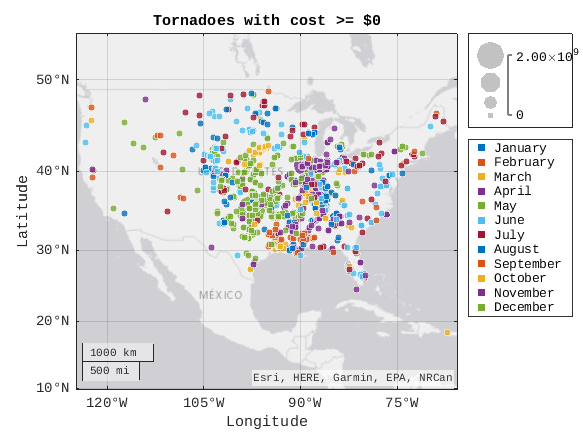

In [4]:
minDamage = 0;    % modify this to change which tornados are included in the plot

% Select tornadoes above a damage threshold set by the minDamage variable
tornadoes = events(events.Event_Type == "Tornado" & events.Total_Damage >= minDamage, :);
% Plot the results on a map
geobubble(tornadoes.Begin_Lat,tornadoes.Begin_Lon,tornadoes.Total_Damage, tornadoes.Month);
title("Tornadoes with cost >= $" + minDamage)

## Plot tornadoes for a given month
    
Change the `eventMonth` variable and rerun the cell to observe how the number and location of tornadoes varies throughout the year. 
All tornadoes are treated as equal regardless of damage caused.

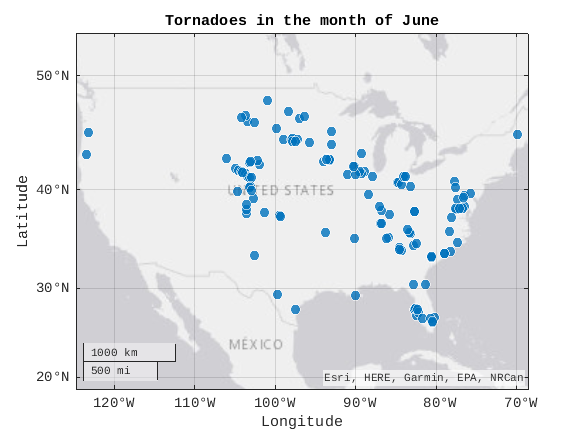

In [5]:
eventMonth = "June";   % Change this and re-run the cell

tornadoes = events(events.Event_Type == "Tornado", :);
tornadoes = tornadoes(tornadoes.Month == eventMonth, :);
geobubble(tornadoes.Begin_Lat,tornadoes.Begin_Lon);
title("Tornadoes in the month of " + eventMonth)

# Calculate Group Summary Statistics

## Create a histogram of tornado events

In the section above, you may have noticed that some months have more tornadoes than others. This section creates a histogram to show the number of tornadoes by month.
* Run this section. Which month has the most tornadoes? Is there a tornado season?

In [6]:
tornadoes = events(events.Event_Type == "Tornado",:);
    
%the tornadoes table has a huge number of columns which can be difficult to displaye, so we will just choose a few columns
tornadoes(:,["Month","Event_Type","Begin_Date_Time","Timezone"])

ans = 1053x4 table
   <strong>Month</strong>     <strong>Event_Type</strong>      <strong>Begin_Date_Time</strong>       <strong>Timezone</strong>
    <strong>_______</strong>    <strong>__________</strong>    <strong>____________________</strong>    <strong>________</strong>

    June        Tornado      13-Jun-2013 14:38:00     EST-5  
    July        Tornado      22-Jul-2013 23:12:00     EST-5  
    October     Tornado      04-Oct-2013 17:25:00     CST-6  
    October     Tornado      04-Oct-2013 16:59:00     CST-6  
    July        Tornado      23-Jul-2013 16:22:00     EST-5  
    June        Tornado      04-Jun-2013 18:16:00     CST-6  
    June        Tornado      25-Jun-2013 22:25:00     CST-6  
    May         Tornado      08-May-2013 17:30:00     CST-6  
    May         Tornado      16-May-2013 14:06:00     CST-6  
    May         Tornado      20-May-2013 16:05:00     CST-6  
    May         Tornado      20-May-2013 15:50:00     CST-6  
    June        Tornado      02-Jun-2013 15:09:00     EST-5  
    April       Tornado      08-Apr-2013 20:06:00     MST-7  
    July        Tornado      26-Jul-2013 14:25:00     CST-6  
    May         Tornado      09-May-2013 16:41:00     CST-6  
    May         Tornado      31-May-2013 19:30:00     EST-5

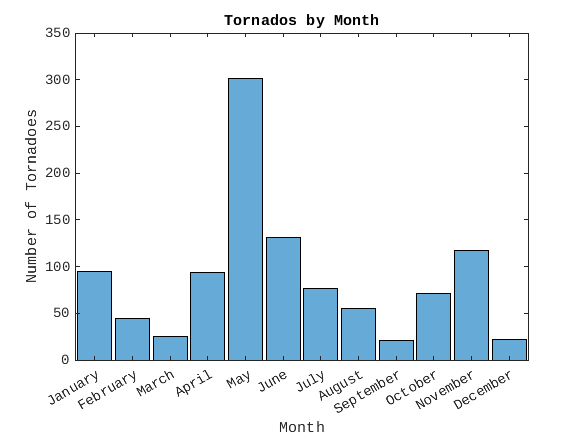

In [41]:
histogram(tornadoes.Month);
title("Tornados by Month")
xlabel("Month")
ylabel("Number of Tornadoes")

# Total damage by month

Looking at the histogram, the month of May had far more tornadoes than any other month. Now examine the damage caused by these tornadoes. 

Change the statistic and re-evaluate the cell

stat = 
   "Max"

cost = 12x3 table
   <strong>Month</strong>      <strong>GroupCount</strong>    <strong>max_Total_Damage</strong>
    <strong>_________</strong>    <strong>__________</strong>    <strong>________________</strong>

    January          95               6e+07    
    February         44             2.5e+07    
    March            25             2.5e+05    
    April            94               4e+06    
    May             301               2e+09    
    June            131             5.3e+05    
    July             77               5e+06    
    August           55               1e+07    
    September        21            1.25e+05    
    October          71               2e+06    
    November        117             9.1e+08    
    December         22               5e+06

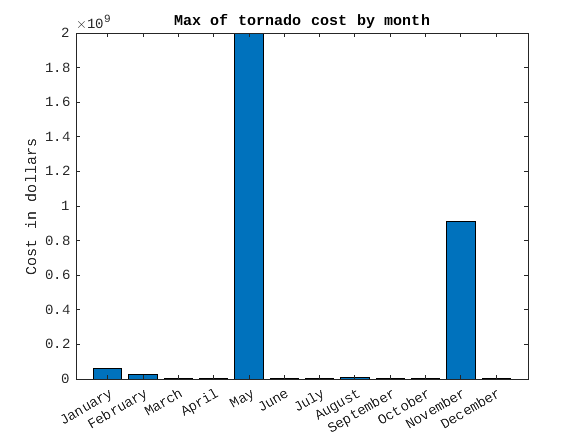

In [49]:
stat = "Max"   % Could also be "Sum", "Mean" or "Max"
tornadoes = events(events.Event_Type == "Tornado",:);
% Group tornadoes by month and calculate the selected stat
cost = groupsummary(tornadoes, "Month", stat, "Total_Damage")

% View the results using a bar chart
bar(cost.Month, cost{:, end})
title(stat + " of tornado cost by month")
ylabel("Cost in dollars")

# Closing Remarks

Notice how quickly creating a variety of visualizations provided an overview of lots of data. What have you learned about tornadoes in the United States in 2013? Hopefully you gained a feel for the data. This is important later when trying to evaluate predictive models. Without a feel for the data, it's difficult to look at the output of a complex model and determine if the results are reasonable.

For now, you can state that in 2013:

* The frequency of tornadoes was less during the winter months than late spring/early summer
* Winter tornadoes tend to be in the southern United States
* An extremely damaging tornado occurred in November

Maybe you have a lot more questions. For example, what states are most affected? What do the results look like for different years? This script just looks at tornadoes, what about all the other storm events? The fun, and challenging, aspect of having lots of data is trying to explore all the possible questions and relationships.

## Want to learn more? Try our Coursera course. 

If you enjoyed this example and would like to learn more about data analysis in MATLAB, maybe try our Coursera course at https://www.coursera.org/learn/exploratory-data-analysis-matlab